# 1 Initialisation

## 1.1 Imports

In [96]:
# Librairies pour le traitement des données
import pandas as pd
# Dask API is a parallelized version of Numpy, Pandas, Sklearn.
import dask.dataframe as dd #  Pour la première fois installer avec la commande 'pip install "dask[complete]"'
import numpy as np

# Librairies pour la visualisation de graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Définir le style par défaut pour les graphiques


# Librairies pour la visualisation de cartes
import folium # Pour la première fois installer avec la commande 'pip install folium' ou 'conda install folium -c conda-forge'. Voir : https://python-visualization.github.io/folium/quickstart.html
import branca.colormap as cm
from branca.element import Template, MacroElement

low_memory=False # faible mémoire vive (RAM)

## 1.2 Définition de fonctions utilitaires

In [97]:
def verifier_taille(data, dask=True):
    """ Fonction de vérification de la taille d'un data set """
    lignes = data.shape[0]
    if dask:
        lignes = lignes.compute()
    colonnes = data.shape[1]
    print('Le data set contient :')
    print('\t-', lignes, 'lignes et', colonnes, 'colonnes.')

    nb_null = data.isnull().sum().sum()
    if dask:
        nb_null = nb_null.compute()
    taille = lignes*colonnes
    taille_null = 100*nb_null/taille
    taille_non_null = 100*(taille-nb_null)/taille
    print('\t-', nb_null, 'valeurs manquantes, ce qui représente', round(taille_null,2), '% du data set.')

    # Afficher la répartition du taux de valeurs manquantes
    nan_data = pd.DataFrame({'valeurs (%)': [''], 'non-null('+str(round(taille_non_null,2))+'%)': [taille_non_null], 'null('+str(round(taille_null,2))+'%)': [taille_null]})
    nan_data.set_index('valeurs (%)').plot(kind='barh', stacked=True, color=['green', 'orange'], figsize=(8,2), fontsize=12)
    plt.xlabel('%')

def afficher_echantillon(data, n=0.00002):
    """ Afficher un sous-échantillon aléatoire """
    print('Voici un sous-échantillon aléatoire :')
    return data.sample(frac=n, random_state=np.random.seed())

def valeurs_manquantes(data):
    """ Retourner les valeurs manquantes d'un data frame/set """
    return data[data.isnull().any(axis=1)]

## 1.3 Récupération du Data Set

In [98]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=low_memory, parse_dates=['created_datetime','last_modified_datetime'], infer_datetime_format=True)

## Structure du data set

In [ ]:
df.shape

(320772, 162)

In [ ]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [ ]:
df.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


Le data set contient :
	- 320772 lignes et 162 colonnes.
	- 39608589 valeurs manquantes, ce qui représente 76.22 % du data set.


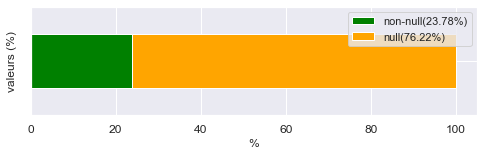

In [ ]:
verifier_taille(df, False)


In [ ]:
afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
160278,0852909003602,http://world-fr.openfoodfacts.org/produit/0852...,usda-ndb-import,1489070168,2017-03-09T14:36:08Z,1489070168,2017-03-09T14:36:08Z,California Orange Juice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
117712,0608819254913,http://world-fr.openfoodfacts.org/produit/0608...,usda-ndb-import,1489136151,2017-03-10T08:55:51Z,1489136151,2017-03-10T08:55:51Z,Deluxe Mix Nuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN
187814,3018253273000,http://world-fr.openfoodfacts.org/produit/3018...,julian,1462304892,2016-05-03T19:48:12Z,1462305029,2016-05-03T19:50:29Z,Terrine Alsacienne,NaN,170 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123539,0674806004892,http://world-fr.openfoodfacts.org/produit/0674...,usda-ndb-import,1489137526,2017-03-10T09:18:46Z,1489137526,2017-03-10T09:18:46Z,Perfect Bite Tostadas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0,NaN,NaN
203013,3240931536873,http://world-fr.openfoodfacts.org/produit/3240...,shaolan,1391974715,2014-02-09T19:38:35Z,1428855482,2015-04-12T16:18:02Z,"Tortellini Pesto (+ 10 % Gratuit), LunchBox",Tortellini fromages agrémentés d'une sauce cui...,330 g (300 g + 30 g),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306358,8410076014641,http://world-fr.openfoodfacts.org/produit/8410...,max4food,1424895503,2015-02-25T20:18:23Z,1424895537,2015-02-25T20:18:57Z,hearts of palm,NaN,410 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['code'].isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France, en:switzerland","en:belgium,en:france,en:switzerland","Belgique,France,Suisse","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France",SuperU,France,en:france,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,NaN,villecomtal-sur-arros-gers-france,"Torcy 77,France",Carrefour,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,France,en:france,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,NaN,villecomtal-sur-arros-gers-france,"Saint-Priest,France",Auchan,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['code'].notnull()]

## Restructuration

In [ ]:
# Transformation des colonnes dates
dates_t = ['created_t', 'last_modified_t']
for date in dates_t:
    df[date] = dd.to_datetime(df[date], unit='s')

In [ ]:
# Suppression de colonnes non pertinentes
df = df.drop(columns=['created_datetime', 'last_modified_datetime'])

In [ ]:
df.dtypes

code                               object
url                                object
creator                            object
created_t                  datetime64[ns]
last_modified_t            datetime64[ns]
                                ...      
carbon-footprint_100g             float64
nutrition-score-fr_100g           float64
nutrition-score-uk_100g           float64
glycemic-index_100g               float64
water-hardness_100g               float64
Length: 160, dtype: object

In [ ]:
afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
142969,0761720058671,http://world-fr.openfoodfacts.org/produit/0761...,usda-ndb-import,2017-03-10 09:25:22,2017-03-10 09:25:22,Corn Oil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207235,3250391754915,http://world-fr.openfoodfacts.org/produit/3250...,kiliweb,2017-02-27 12:57:14,2017-02-27 12:57:14,", Coeurs de palmier sauvage bio, 250 g net ego...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
80976,0072488987470,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,2017-03-09 16:18:07,2017-03-09 16:18:07,Omega 3 Mix,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
199440,3217033720004,http://world-fr.openfoodfacts.org/produit/3217...,tacite,2015-06-23 10:05:23,2015-06-24 10:26:28,Pâté de lapin,NaN,"0,230 kg",Plastique,plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18925,0021333300605,http://world-fr.openfoodfacts.org/produit/0021...,usda-ndb-import,2017-03-09 14:36:59,2017-03-09 14:36:59,Country Doctor Soda,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319264,9300682035620,http://world-fr.openfoodfacts.org/produit/9300...,foodorigins,2016-05-08 05:36:55,2016-05-28 10:07:55,NaN,NaN,NaN,Plastic,plastic,...,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,NaN,NaN


In [ ]:
df[df.duplicated()]

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


In [ ]:
# Supprimer les colonnes vides
df = df.dropna(how='all', axis=1)
df.shape

(320749, 139)

In [ ]:
# Suppression de colonnes non pertinentes
# df = df.drop(columns=['created_datetime', 'last_modified_datetime'])

# PCA

In [ ]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [ ]:
# choix du nombre de composantes à calculer
n_comp = 10
Fs = [(i,i+1) for i in range(0,10,2)]
print(Fs)

# selection des colonnes à prendre en compte dans l'ACP
cols = ["additives_n","energy_100g","energy-from-fat_100g","proteins_100g", "carbohydrates_100g", "sugars_100g", "saturated-fat_100g", "fiber_100g", "sodium_100g", "fruits-vegetables-nuts_100g", "carbon-footprint_100g", "nutrition-score-fr_100g"]
data_pca = df[cols]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values

[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]


In [ ]:
names = df["code"] # ou data.index pour avoir les intitulés
features = df[cols].columns

In [ ]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [ ]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=10)

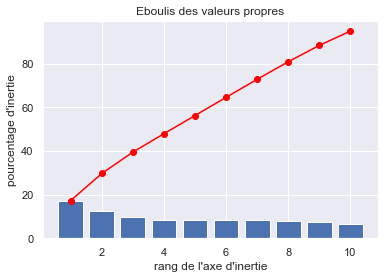

In [ ]:
# Eboulis des valeurs propres
display_scree_plot(pca)

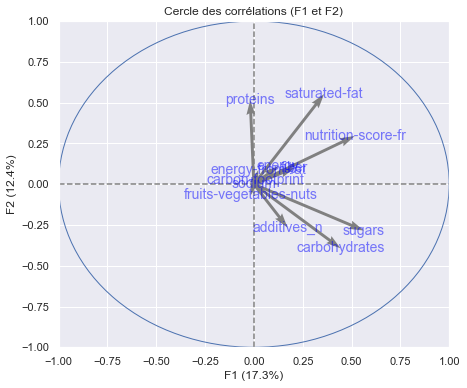

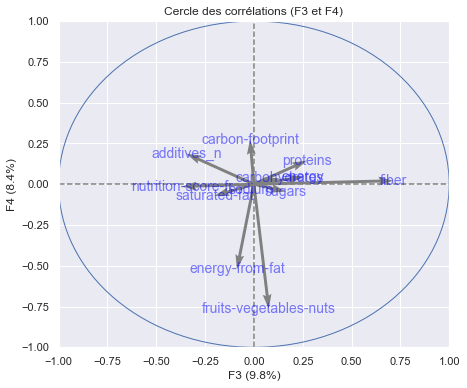

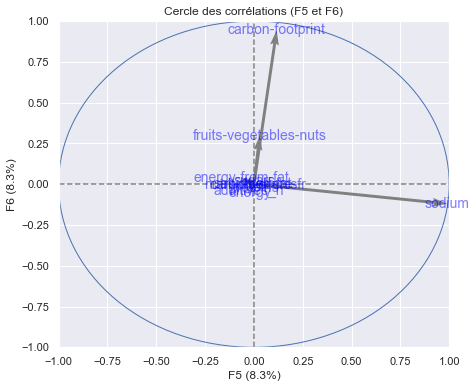

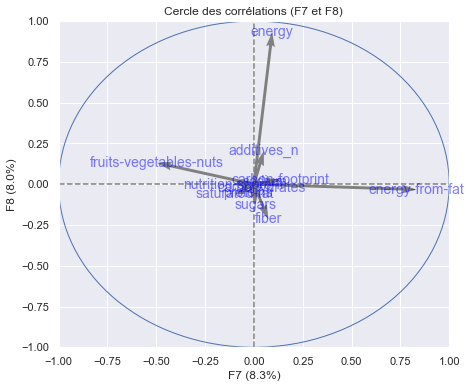

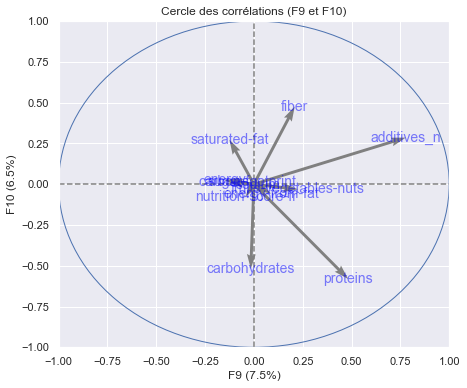

In [ ]:
# Cercle des corrélations
features_labels = [feature.split('_100g')[0] for feature in features]
pcs = pca.components_
display_circles(pcs, n_comp, pca, [Fs], labels = np.array(features_labels))

In [ ]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [Fs], labels = np.array(names))

plt.show()

ValueError: too many values to unpack (expected 2)